In [28]:
import numpy as np
import pandas as pd

In [29]:
ld=pd.read_csv('D:/programming tools/DATA SET/loans data.csv')

In [30]:
ld.size

37500

In [31]:
ld.shape

(2500, 15)

In [32]:
ld.head(2)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2.0,< 1 year
1,99592.0,19200,19200,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1.0,2 years


In [33]:
ld.dtypes

ID                                float64
Amount.Requested                   object
Amount.Funded.By.Investors         object
Interest.Rate                      object
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio               object
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [34]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
ID                                2499 non-null float64
Amount.Requested                  2499 non-null object
Amount.Funded.By.Investors        2499 non-null object
Interest.Rate                     2500 non-null object
Loan.Length                       2499 non-null object
Loan.Purpose                      2499 non-null object
Debt.To.Income.Ratio              2499 non-null object
State                             2499 non-null object
Home.Ownership                    2499 non-null object
Monthly.Income                    2497 non-null float64
FICO.Range                        2500 non-null object
Open.CREDIT.Lines                 2496 non-null object
Revolving.CREDIT.Balance          2497 non-null object
Inquiries.in.the.Last.6.Months    2497 non-null float64
Employment.Length                 2422 non-null object
dtypes: float64(3), object(12)
memory usage: 293.0+ KB


In [35]:
ld.describe()

,ID,Monthly.Income,Inquiries.in.the.Last.6.Months
count,2499.000000,2497.000000,2497.000000
mean,51643.325330,5689.716608,0.906688
std,30053.637661,3963.568002,1.231149
min,10.000000,588.500000,0.000000
25%,26570.500000,3500.000000,0.000000
50%,50673.000000,5000.000000,0.000000
75%,77583.000000,6800.000000,1.000000
max,104202.000000,102750.000000,9.000000


# we have to convert all object to float or integer becouse for analysis we have to use only numerical data

In [36]:
# replace vacant values by NaN
ld['Amount.Requested']=pd.to_numeric(ld['Amount.Requested'],errors='coerce')

In [37]:
ld['Amount.Funded.By.Investors']=pd.to_numeric(ld['Amount.Funded.By.Investors'],errors='coerse')

In [38]:
ld['Interest.Rate']=ld['Interest.Rate'].str.replace('%','')

In [39]:
ld['Interest.Rate']=pd.to_numeric(ld['Interest.Rate'],errors='coerse')

In [40]:
# remove some strings values from table that was somewas problematic in nature
ld['Loan.Length']=ld['Loan.Length'].str.replace('months','')

In [41]:
ld['Loan.Length']=pd.to_numeric(ld['Loan.Length'],errors='coerse')

In [42]:
ld['Debt.To.Income.Ratio']=ld['Debt.To.Income.Ratio'].str.replace('%','')

In [43]:
ld['Debt.To.Income.Ratio']=pd.to_numeric(ld['Debt.To.Income.Ratio'],errors='coerse')

In [44]:
ld.dtypes

ID                                float64
Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                       float64
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                  object
Revolving.CREDIT.Balance           object
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object

In [45]:
#for fico rang
ld['F1']=ld['FICO.Range'].str[0:2]
ld['F2']=ld['FICO.Range'].str[3:]

In [46]:
ld['F1']=pd.to_numeric(ld['F1'],errors='coerse')

In [47]:
ld['F2']=pd.to_numeric(ld['F2'],errors='cooerse')

In [48]:
ld['FECO MEAN']=(ld['F1']+ld['F2'])/2

In [49]:
ld.head(2)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,F1,F2,FECO MEAN
0,81174.0,20000.0,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14,14272,2.0,< 1 year,73,-739,-333.0
1,99592.0,19200.0,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12,11140,1.0,2 years,71,-719,-324.0


In [50]:
ld['Employment.Length']=ld['Employment.Length'].str.replace('years','')

In [51]:
ld['Employment.Length']=ld['Employment.Length'].str.replace('year','')

ld['Employment.Length']=ld['Employment.Length'].str.replace('+','')
ld['Employment.Length']=ld['Employment.Length'].str.replace('< 1','0')
ld['Employment.Length']=pd.to_numeric(ld['Employment.Length'],errors='coerse')


In [52]:
ld=ld.drop(['FICO.Range','F1','F2','Amount.Funded.By.Investors'],axis=1)

In [53]:
ld.head(2)

,ID,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FECO MEAN
0,81174.0,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,14,14272,2.0,0.0,-333.0
1,99592.0,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,12,11140,1.0,2.0,-324.0


In [54]:
ld['Revolving.CREDIT.Balance']=pd.to_numeric(ld['Revolving.CREDIT.Balance'],errors='coerse')
ld['Open.CREDIT.Lines']=pd.to_numeric(ld['Open.CREDIT.Lines'],errors='coerse')

In [55]:
ld=ld.drop(['State'],axis=1)

In [56]:
ld.dtypes

ID                                float64
Amount.Requested                  float64
Interest.Rate                     float64
Loan.Length                       float64
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
Home.Ownership                     object
Monthly.Income                    float64
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                 float64
FECO MEAN                         float64
dtype: object

In [57]:
dummy1=pd.get_dummies(ld['Home.Ownership'])

In [58]:
dummy1.head(2)

,MORTGAGE,NONE,OTHER,OWN,RENT
0,1,0,0,0,0
1,1,0,0,0,0


In [59]:
dummy2=dummy1.drop(['NONE'],axis=1)

In [60]:
dummy2.head(2)

,MORTGAGE,OTHER,OWN,RENT
0,1,0,0,0
1,1,0,0,0


In [61]:
ld.head(2)

,ID,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FECO MEAN
0,81174.0,20000.0,8.90,36.0,debt_consolidation,14.90,MORTGAGE,6541.67,14.0,14272.0,2.0,0.0,-333.0
1,99592.0,19200.0,12.12,36.0,debt_consolidation,28.36,MORTGAGE,4583.33,12.0,11140.0,1.0,2.0,-324.0


In [62]:
ld['Loan.Purpose'].value_counts()

debt_consolidation    1307
credit_card            444
other                  200
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan.Purpose, dtype: int64

In [63]:
dummy3=pd.get_dummies(ld['Loan.Purpose'])

In [64]:
dummy3.head(2)

,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [65]:
ld_2=pd.concat([ld,dummy3['debt_consolidation'],dummy3['credit_card'],dummy3['other'],dummy3['home_improvement']],axis=1)

In [66]:
ld_main=ld_2.drop(['Home.Ownership'],axis=1)

In [67]:

ld_main=ld_main.drop(['Loan.Purpose'],axis=1)

In [68]:
ld_main.dtypes

ID                                float64
Amount.Requested                  float64
Interest.Rate                     float64
Loan.Length                       float64
Debt.To.Income.Ratio              float64
Monthly.Income                    float64
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                 float64
FECO MEAN                         float64
debt_consolidation                  uint8
credit_card                         uint8
other                               uint8
home_improvement                    uint8
dtype: object

In [69]:
#to know where the value of NaN is stored and of what number
ld_main.isnull().sum()

ID                                 1
Amount.Requested                   5
Interest.Rate                      0
Loan.Length                        2
Debt.To.Income.Ratio               1
Monthly.Income                     3
Open.CREDIT.Lines                  9
Revolving.CREDIT.Balance           5
Inquiries.in.the.Last.6.Months     3
Employment.Length                 80
FECO MEAN                          0
debt_consolidation                 0
credit_card                        0
other                              0
home_improvement                   0
dtype: int64

In [88]:
#to remove the rows of value of NaN from the table
ld_main=ld_main.dropna()

In [89]:
ld_main.isnull().sum()

ID                                0
Amount.Requested                  0
Interest.Rate                     0
Loan.Length                       0
Debt.To.Income.Ratio              0
Monthly.Income                    0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
FECO MEAN                         0
debt_consolidation                0
credit_card                       0
other                             0
home_improvement                  0
dtype: int64

# Linear regression start

In [90]:
# for selectingg data  randomlly we can import random command and scikit learn
import random as rd

In [91]:
# here we install sub package{model selection} of module{trin and test} of sk learn and same for linear regression
#most of the time machine learning main function start with capital letter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [92]:
# objective of linear regression is find out the intrest rate on loan and from personal data
x=ld_main.drop(['Interest.Rate','ID'],axis=1) #
y=ld_main['Interest.Rate']

In [93]:
x.head(2)

,Amount.Requested,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FECO MEAN,debt_consolidation,credit_card,other,home_improvement
0,20000.0,36.0,14.90,6541.67,14.0,14272.0,2.0,0.0,-333.0,1,0,0,0
1,19200.0,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,-324.0,1,0,0,0


In [94]:
y.head(2)

0     8.90
1    12.12
Name: Interest.Rate, dtype: float64

# to split data in train and test for machine learning

In [113]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=0)# for state=0 we can use any value

In [1]:
LR=LinearRegression()

SyntaxError: invalid syntax (<ipython-input-1-01fd64e2b590>, line 1)

In [115]:
#fit(sub function of linear regression) function is for predicted line
ld_model=LR.fit(xtrain,ytrain)

In [116]:
# to know the coefficient of x 
ld_model.coef_

array([ 1.61032553e-04,  1.30194602e-01, -1.53909173e-03, -3.78235362e-05,
       -3.19909718e-02, -4.74458107e-06,  3.32430431e-01,  8.03412602e-03,
        1.95911419e-01, -3.92837057e-01, -6.80813243e-01,  3.61879519e-01,
       -4.26339091e-01])

In [117]:
temp_model_coeff=pd.DataFrame(xtrain.columns)
temp_model_coeff['coefficient']=ld_model.coef_
temp_model_coeff

,0,coefficient
0,Amount.Requested,0.000161
1,Loan.Length,0.130195
2,Debt.To.Income.Ratio,-0.001539
3,Monthly.Income,-0.000038
4,Open.CREDIT.Lines,-0.031991
5,Revolving.CREDIT.Balance,-0.000005
6,Inquiries.in.the.Last.6.Months,0.332430
7,Employment.Length,0.008034
8,FECO MEAN,0.195911
9,debt_consolidation,-0.392837


# for predicting intrest rate

In [118]:
yprd=LR.predict(xtest)

In [119]:
yprd

array([13.68792792, 11.83770161,  8.20449106, 14.70788256, 12.46782957,
        9.32856704, 15.60745901,  7.76651684, 12.14996004, 14.65778768,
       18.1904815 , 12.96393446, 15.74961338, 19.65214794, 11.64793004,
        3.62226036, 16.61971692,  2.83212164, 13.59618676, 11.59668893,
       10.91607512,  9.165678  , 18.74059525, 10.52520187, 14.96421368,
       15.1809477 , 20.5805653 , 10.85336561, 16.3155022 ,  7.06389271,
       10.94173796, 16.6078397 ,  8.3249115 , 14.49796235,  9.43275907,
       11.29132238, 10.68746809,  7.77283269,  2.18223672,  8.94311238,
       14.02197423, 11.30335899,  6.30511846, 10.13580278, 16.86691774,
       15.83427492, 14.41920904, 11.78355566, 15.25214492, 14.01594666,
       12.01195896, 13.51028653, 15.48404083, 15.46266754, 13.88088577,
       17.24648244, 13.60054906, 16.95596668, 15.27245858, 15.04634797,
       19.53926655, 13.73379478, 14.75595683, 14.75135436, 11.77274494,
       14.92506281, 13.14680288, 17.81752738, 10.20044882, 10.12

In [120]:
# make table of xtest,y test,y predict,difference,and square root of difference of intrest rate
temp_compare=pd.DataFrame(ytest)# to make table
temp_compare['predicted_Interest_Rate']=yprd
temp_compare.head()

,Interest.Rate,predicted_Interest_Rate
2037,11.14,13.687928
271,10.36,11.837702
2022,7.49,8.204491
1742,17.27,14.707883
427,13.11,12.467830


# find root mean square 

In [121]:
#root mean square show only one value which is mean of difference
# first we square and find mean of all data then we root its mean
rmse=(np.mean((yprd-ytest)**2))**(1/2)
rmse

2.082457828767621

# to find R sq.

In [122]:
ld_model.score(xtest,ytest)

0.7561902944019401

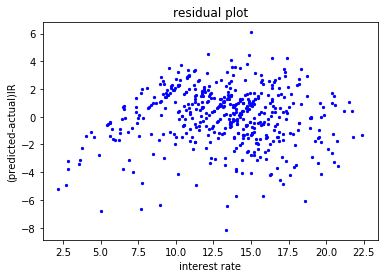

In [123]:
# ideally the error should be of random values i.e. it can not follow any pattern (it is called homoscadasticity)
# if data is not random then it called heteroscadasticity model i.e. it has some outlier
import matplotlib.pyplot as plt   #for graph
temp_plot=plt.scatter(yprd,(yprd-ytest),c='b',s=5)# yprd is x axis and difference is y axis
plt.title('residual plot')
plt.xlabel("interest rate")
plt.ylabel('(predicted-actual)IR')
plt.show()# must write

In [124]:
import statsmodels.api as sm

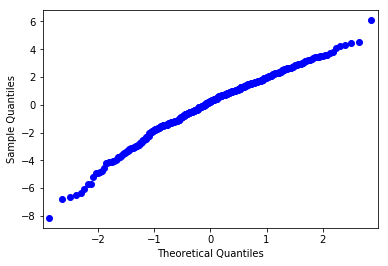

In [125]:
# to know that data is  normally distributed or not
resid=yprd-ytest
fig=sm.qqplot(resid)
plt.show()

In [126]:
ld_model.intercept_

68.94585874721106

In [ ]:
# to find outlier we use cook distance plot 
#box plot is use to remove outliers in data(stake hold/get hub)
import sklearn.matrics import mean_square_error
class CookDist (ld_model)